In [9]:
import cv2
from tqdm import tqdm, trange
from tensorflow.keras.optimizers import Adam
import pandas as pd
import seaborn as sn
from google.colab.patches import cv2_imshow
from keras.preprocessing import image
import tensorflow as tf
import numpy as np
import os
from keras.preprocessing.image import ImageDataGenerator
import keras
from keras.models import Sequential, Model,load_model
from keras.callbacks import EarlyStopping,ModelCheckpoint, ReduceLROnPlateau, CSVLogger
from google.colab.patches import cv2_imshow
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D,MaxPool2D, Dropout,GlobalAveragePooling2D
from keras.preprocessing import image
from keras.initializers import glorot_uniform
from keras.models import Model
import tensorflow as tf 
from tensorflow.keras.applications import *
from tensorflow.keras.optimizers import RMSprop, SGD
import matplotlib.pyplot as plt
from keras.applications.vgg16 import VGG16
from keras.models import load_model

In [2]:
train_generator  = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1/255.,
    validation_split = 0.2
)

In [3]:
train = train_generator.flow_from_directory(
    "/content/drive/MyDrive/15p_gg/data_money/data",
    target_size=(224,224),
    subset = "training",
    class_mode="categorical",
    shuffle = True
)
valid = train_generator.flow_from_directory(
    "/content/drive/MyDrive/15p_gg/data_money/data",
    target_size=(224,224),
    subset = "validation",
    class_mode="categorical",
    shuffle = True
)

Found 2244 images belonging to 3 classes.
Found 560 images belonging to 3 classes.


In [4]:
train.class_indices

{'10000': 0, '20000': 1, '50000': 2}

In [5]:
model_efficientNet= VGG16(include_top= False, weights= "imagenet", input_shape= (224,224,3))
model = Sequential()
model.add(model_efficientNet)
model.add(GlobalAveragePooling2D())
model.add(Dropout(0.2))
model.add(Dense(3, activation = "sigmoid"))
opt = SGD(lr = 0.0001,momentum=0.9)
model.compile(optimizer = opt, loss = 'categorical_crossentropy',metrics=['accuracy'])

history = model.fit(train, validation_data = valid, batch_size=128,epochs=10,verbose=1)
model.save("/content/drive/MyDrive/15p_gg/model_MONEY_CNN.h5")

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/10
71/71 [==============================] - 312s 4s/step - loss: 1.0641 - accuracy: 0.4648 - val_loss: 0.9361 - val_accuracy: 0.7036
Epoch 2/10
71/71 [==============================] - 39s 544ms/step - loss: 0.5777 - accuracy: 0.8128 - val_loss: 0.3113 - val_accuracy: 0.9036
Epoch 3/10
71/71 [==============================] - 37s 522ms/step - loss: 0.1167 - accuracy: 0.9652 - val_loss: 0.3643 - val_accuracy: 0.8036
Epoch 4/10
71/71 [==============================] - 38s 530ms/step - loss: 0.0466 - accuracy: 0.9857 - val_loss: 0.0440 - val_accuracy: 0.9964
Epoch 5/10
71/71 [==============================] - 38s 532ms/step - loss: 0.0313 - accuracy: 0.9902 - val_loss: 0.0668 - val_accuracy: 0.9893
Epoch 6/10
71/71 [==============================] - 37s 525ms/step - loss: 0.0265 - accuracy: 0.9902 - val_loss: 0.2143 - val_accuracy: 0.8839
Epoch 7/10
71/71 [==============================] - 38s 531ms/step - loss: 0.0176 - accuracy: 0.9951 - val_loss: 0.0099 - val_accuracy: 0.9982
E

In [10]:
model = load_model('/content/drive/MyDrive/15p_gg/model_MONEY_CNN.h5')

In [6]:
score = model.evaluate(valid,verbose=0)
print('Test loss: ',score[0])
print('test accuraccy',score[1])


Test loss:  0.012161933816969395
test accuraccy 0.9982143044471741


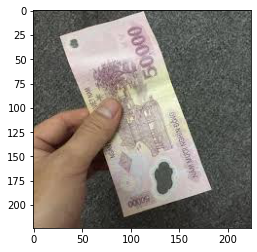

In [13]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img


img = load_img('/content/drive/MyDrive/15p_gg/test money.jfif', target_size=(224,224))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,224,224,3)
img = img.astype('float32')
img/=255.0

In [14]:
a = np.argmax(model.predict(img), axis=-1)
print(model.predict(img))
if a==0:
  print("10000 vnd")
elif a==1:
  print("20000 vnd")
elif a == 2:
  print("50000 vnd")


[[0.00166178 0.1052703  0.99992186]]
50000 vnd
